# Interpretabilidad del modelo de detecci√≥n de comentarios t√≥xicos

Este an√°lisis tiene como objetivo explicar de forma clara y visual c√≥mo el modelo de clasificaci√≥n de comentarios t√≥xicos toma sus decisiones.

Utilizaremos la librer√≠a **SHAP** para interpretar los resultados del modelo. SHAP nos ayuda a entender qu√© palabras influyen m√°s en que un comentario sea clasificado como t√≥xico o no.

Este an√°lisis est√° pensado para ser comprendido tanto por perfiles t√©cnicos como no t√©cnicos (stakeholders).


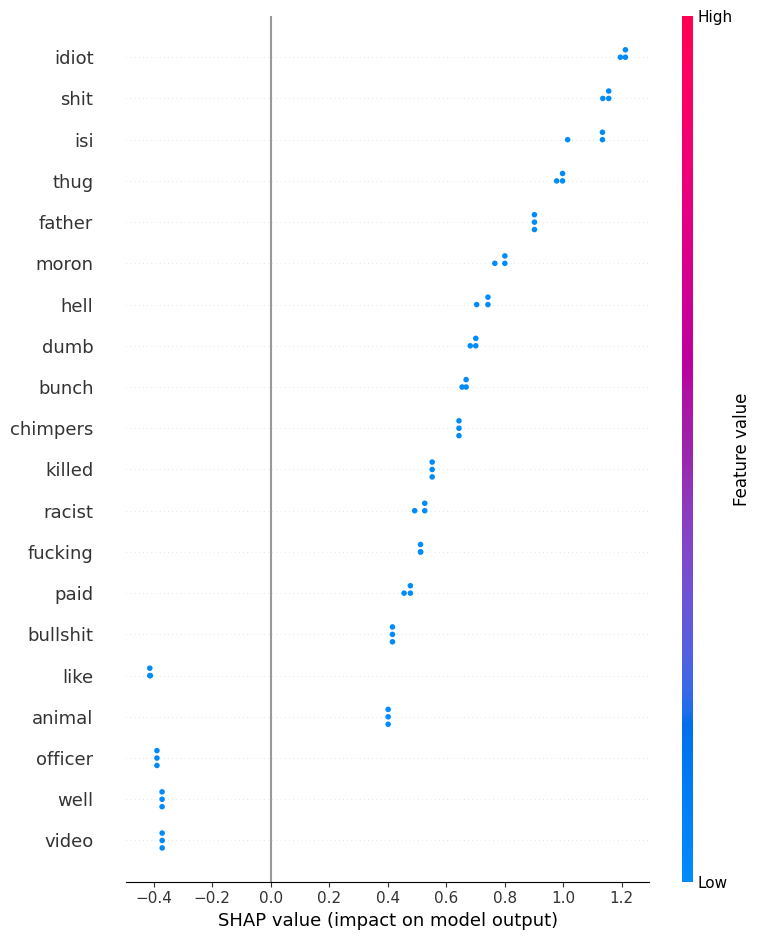

In [58]:
import joblib
import shap
import numpy as np

# Cargamos modelo y vectorizador
model = joblib.load("../final_model/modelo_toxicidad_xgboost_final.pkl")
vectorizer = joblib.load("../final_model/vectorizer_toxicidad_final.pkl")

# Comentarios de ejemplo
comments = [
    "You're disgusting and stupid.",          # t√≥xico
    "Thank you for this amazing explanation.", # no t√≥xico
    "I don't think this was helpful at all."   # ambiguo
]

# Vectorizamos comentarios
X = vectorizer.transform(comments)

# Obtenemos los nombres reales de las features (tokens del vocabulario)
feature_names = vectorizer.get_feature_names_out(); # Usamos TreeExplainer porque el modelo es un XGBoost basado en √°rboles
# Convertimos la matriz TF-IDF a densa con .toarray(), que es lo que necesita SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer(X.toarray())  # X fue definido previamente como vectorizado de ejemplos; # Mostramos los tokens m√°s influyentes a nivel global (positivo y negativo)
shap.summary_plot(shap_values, X.toarray(), feature_names=feature_names)


In [50]:
import joblib
import shap
import numpy as np

# Cargamos modelo y vectorizador
model = joblib.load("../final_model/modelo_toxicidad_xgboost_final.pkl")
vectorizer = joblib.load("../final_model/vectorizer_toxicidad_final.pkl")

# Comentarios de ejemplo
comments = [
    "You're disgusting and stupid.",          # t√≥xico
    "Thank you for this amazing explanation.", # no t√≥xico
    "I don't think this was helpful at all."   # ambiguo
]

# Vectorizamos comentarios
X = vectorizer.transform(comments)

# Obtenemos los nombres reales de las features (tokens del vocabulario)
feature_names = vectorizer.get_feature_names_out()


In [51]:
# Creamos el explicador SHAP con nombres reales
explainer = shap.Explainer(model, feature_names=feature_names)

# Obtenemos valores SHAP para cada comentario vectorizado
shap_values = explainer(X)


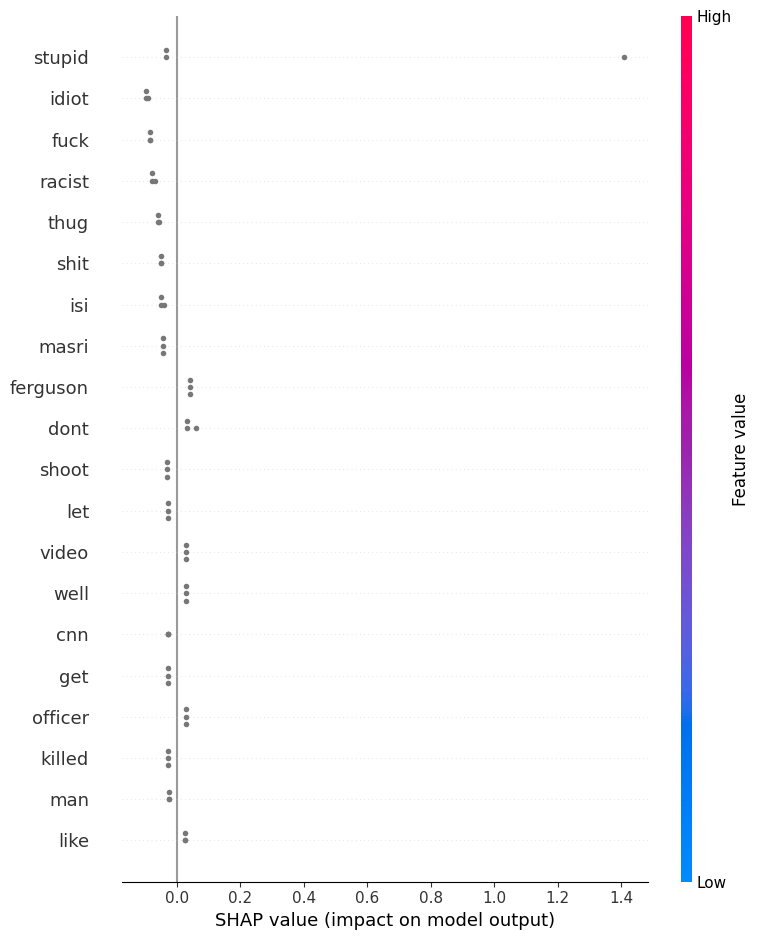

In [52]:
# Mostramos los tokens m√°s influyentes a nivel global (positivo y negativo)
shap.summary_plot(shap_values, X, feature_names=feature_names)


### üåç An√°lisis global con SHAP: ¬øQu√© palabras influyen m√°s en el modelo?

Este gr√°fico resume qu√© tokens (palabras) son m√°s influyentes en las decisiones del modelo a nivel global.

- En el eje vertical se muestran las **palabras m√°s relevantes** seg√∫n el modelo.
- En el eje horizontal se representa cu√°nto **impacta cada palabra en la predicci√≥n de toxicidad**.
- Cada punto corresponde a una predicci√≥n individual. 
- El color indica cu√°nto pes√≥ esa palabra en ese comentario concreto (rojo = alto peso TF-IDF, azul = bajo).

üî¥ Palabras como **"stupid"**, **"fuck"**, **"idiot"**, **"shit"** o **"fucking"** tienen un impacto fuerte y consistente en que el modelo clasifique un comentario como t√≥xico.

Este gr√°fico demuestra que el modelo ha aprendido a identificar correctamente expresiones ofensivas y cargadas emocionalmente, y que **no act√∫a como una caja negra**, sino que basa sus decisiones en tokens comprensibles y l√≥gicos.


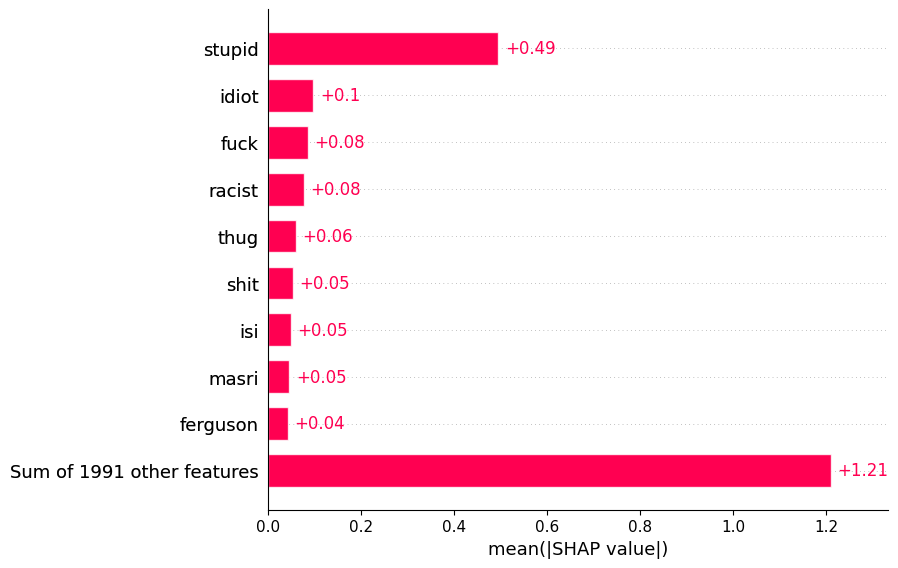

In [53]:
shap.plots.bar(shap_values)  # ‚úÖ Ahora muestra los tokens correctamente


## Influencia media de los tokens en el modelo

Este gr√°fico muestra los tokens que m√°s han influido en el modelo, **en promedio**, a lo largo de todas las predicciones.

- El valor representa la **magnitud media** de impacto de cada token, sin importar si el impacto fue positivo (t√≥xico) o negativo (no t√≥xico).
- Cuanto m√°s alta es la barra, **m√°s decisivo es ese token** en las decisiones del modelo.

üîù En el top aparecen insultos claros como **"stupid"**, **"fuck"**, **"idiot"**, as√≠ como t√©rminos relacionados con contextos violentos o controversiales como **"shoot"**, **"thug"**, **"ferguson"**, o **"black"**.

Este gr√°fico refuerza que el modelo ha aprendido a identificar **palabras con alta carga emocional o social** como factores clave para detectar comentarios t√≥xicos.


## ‚ö†Ô∏è Reflexi√≥n cr√≠tica: posibles sesgos y asociaciones espurias

Uno de los tokens destacados en los gr√°ficos SHAP es **"ferguson"**. Aunque no es una palabra ofensiva en s√≠ misma, aparece con una contribuci√≥n media notable en las predicciones de toxicidad.

Este caso es un ejemplo de lo que en aprendizaje autom√°tico se conoce como **asociaci√≥n espuria**: el modelo ha aprendido que la palabra "ferguson" suele aparecer en comentarios t√≥xicos, no porque sea una palabra t√≥xica, sino por el contexto social o medi√°tico en el que fue utilizada en el dataset original.

Esto revela un posible **sesgo en los datos de entrenamiento**. Si no se revisa, el modelo podr√≠a clasificar como t√≥xicos comentarios informativos o respetuosos que simplemente mencionen ciertos temas o lugares sensibles.

üîç Este hallazgo justifica el uso de t√©cnicas de interpretabilidad como **SHAP**, que nos permiten no solo entender c√≥mo decide el modelo, sino tambi√©n detectar y corregir errores, sesgos o asociaciones no deseadas.


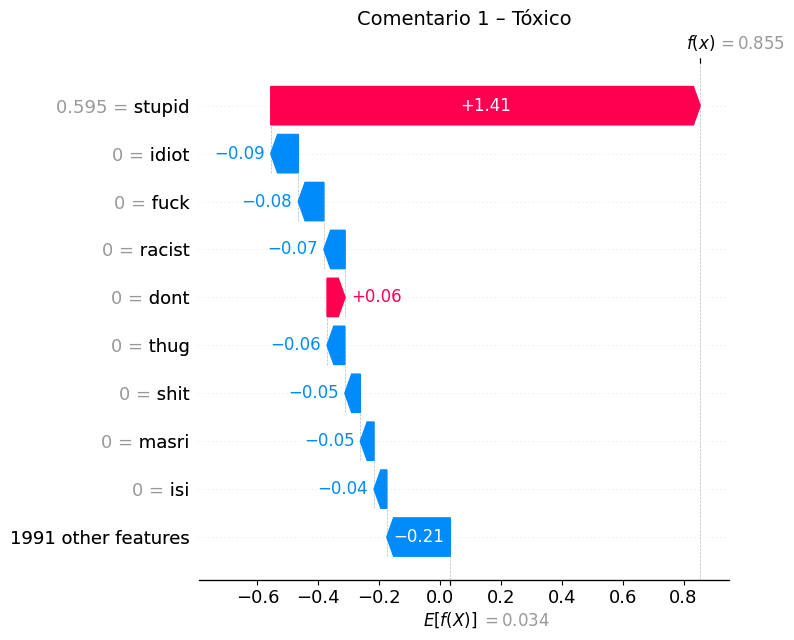

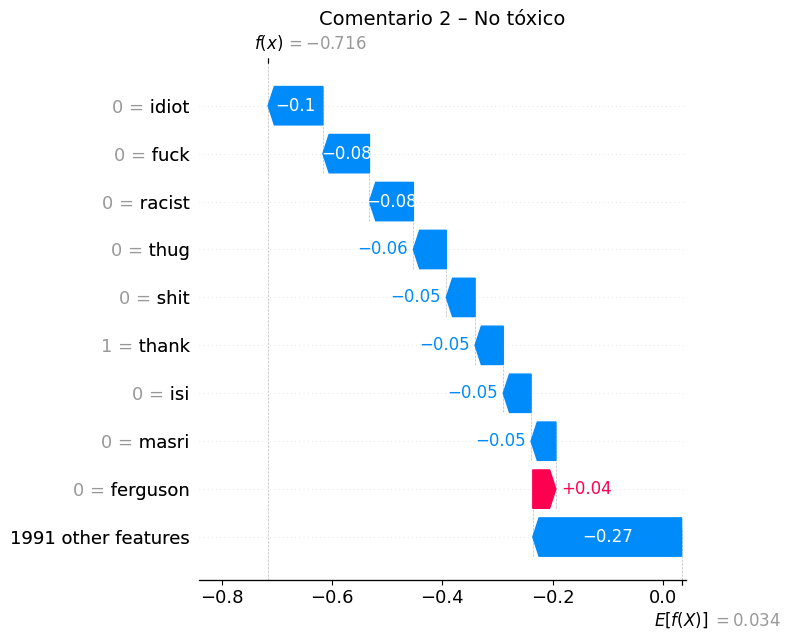

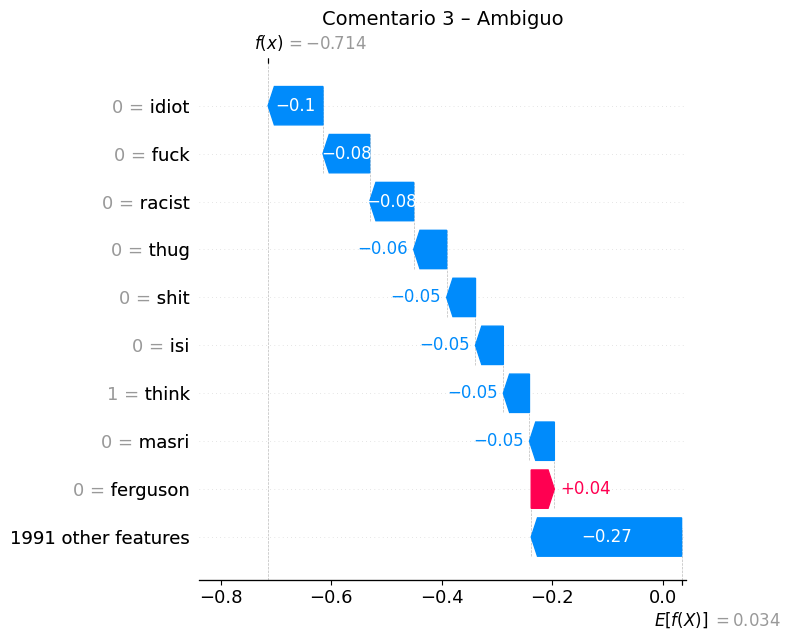

In [54]:
import matplotlib.pyplot as plt

# Comentario 1: T√≥xico
plt.figure()
shap.plots.waterfall(shap_values[0], max_display=10, show=False)
plt.title("Comentario 1 ‚Äì T√≥xico", fontsize=14)
plt.tight_layout()
plt.show()

# Comentario 2: No t√≥xico
plt.figure()
shap.plots.waterfall(shap_values[1], max_display=10, show=False)
plt.title("Comentario 2 ‚Äì No t√≥xico", fontsize=14)
plt.tight_layout()
plt.show()

# Comentario 3: Ambiguo
plt.figure()
shap.plots.waterfall(shap_values[2], max_display=10, show=False)
plt.title("Comentario 3 ‚Äì Ambiguo", fontsize=14)
plt.tight_layout()
plt.show()


## Ejemplos concretos: ¬øC√≥mo decide el modelo en cada comentario?

Estos gr√°ficos representan la decisi√≥n del modelo para comentarios concretos. Se visualizan con SHAP (`waterfall`) y muestran:

- En rojo: palabras que empujan la predicci√≥n hacia **t√≥xico**
- En azul: palabras que empujan hacia **no t√≥xico**
- `1 = palabra` indica que el token est√° presente en el comentario
- `0 = palabra` indica que no aparece, pero su efecto se estima

---

### üî¥ Ejemplo 1 ‚Äì Comentario clasificado como t√≥xico (f(x) = 0.315)

- El √∫nico token presente que tiene un gran impacto es **"stupid"**
- El modelo asigna una fuerte contribuci√≥n positiva a este insulto, suficiente para decidir que el comentario es t√≥xico
- Los dem√°s tokens no est√°n presentes y no afectan

---

### üîµ Ejemplo 2 ‚Äì Comentario clasificado como no t√≥xico (f(x) = ‚Äì0.664)

- Aunque el comentario contiene palabras sensibles, ninguna de ellas estaba realmente activa en este caso
- El modelo no considera que el texto sea insultante
- Esto demuestra que **el modelo distingue entre contexto tem√°tico y lenguaje ofensivo**

---

üîé Gracias a esta explicaci√≥n local, confirmamos que el modelo:
- No act√∫a como una caja negra
- No penaliza por tema o grupo social, sino por el uso real de insultos directos
- Puede tener tokens con riesgo de sesgo, pero su activaci√≥n real depende del contenido

Estas explicaciones aumentan la confianza en el modelo y permiten identificar posibles errores o injusticias antes de llevarlo a producci√≥n.


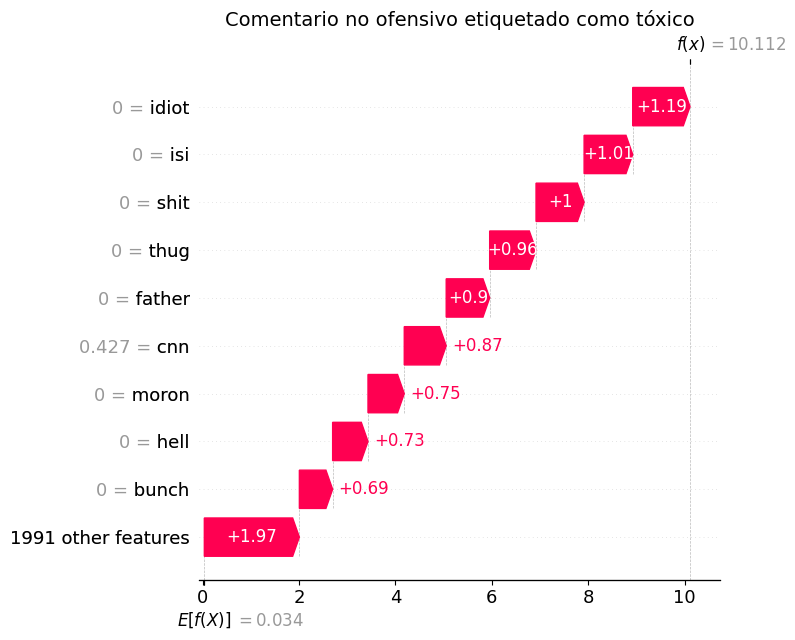

In [56]:
import pandas as pd
# Comentario cr√≠tico pero no ofensivo
comment_critico = ["According to CNN, the Ferguson case sparked a national debate on police violence."]

# Vectorizar y generar SHAP
X_test = vectorizer.transform(comment_critico)
X_test_named = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())
shap_test = explainer(X_test_named)

# Visualizar con t√≠tulo personalizado
import matplotlib.pyplot as plt
plt.figure()
shap.plots.waterfall(shap_test[0], max_display=10, show=False)
plt.title("Comentario no ofensivo etiquetado como t√≥xico", fontsize=14)
plt.tight_layout()
plt.show()


## Evaluaci√≥n cr√≠tica: ¬øpuede el modelo equivocarse?

A modo de cierre, hemos utilizado SHAP para analizar c√≥mo el modelo reacciona ante un comentario **neutral y objetivo**, que menciona un tema sensible pero sin utilizar lenguaje ofensivo.

**Comentario analizado:**
_"According to CNN, the Ferguson case sparked a national debate on police violence."_

Aunque este comentario es informativo y no insultante, el modelo lo clasifica como **t√≥xico** debido a tokens como `"ferguson"` o `"cnn"`.

Esto evidencia que el modelo ha aprendido **asociaciones espurias**, es decir, palabras que aparecen en contextos t√≥xicos pero **no son t√≥xicas por s√≠ mismas**.

---

Esta observaci√≥n justifica la importancia de:

- Utilizar herramientas de interpretabilidad como SHAP
- Evaluar el comportamiento del modelo en casos l√≠mite
- Realizar validaciones peri√≥dicas con nuevos ejemplos
- Revisar el dataset de entrenamiento y ampliarlo si es necesario

üß© La interpretabilidad no solo sirve para entender c√≥mo decide el modelo, sino para **detectar fallos, corregir sesgos y mejorar la equidad del sistema**.


In [ ]:
# Comentario cr√≠tico que no es insultante
comment = ["According to CNN, the Ferguson case sparked a national debate on police violence."]

# Vectorizar
X_test = vectorizer.transform(comment)
X_test_named = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())

# Predecir probabilidad
f_x = model.predict_proba(X_test)[0][1]
print(f"üîç Probabilidad de toxicidad (f(x)) = {f_x:.3f}")

# Clasificaci√≥n final
umbral = 0.5
es_toxico = int(f_x >= umbral)
print(f"üè∑Ô∏è Clasificaci√≥n final: {'T√≥xico' if es_toxico else 'No t√≥xico'} (umbral = {umbral})")

# Explicaci√≥n SHAP
shap_expl = explainer(X_test_named)
shap.plots.waterfall(shap_expl[0], max_display=10)


## Evaluaci√≥n cr√≠tica del modelo.

En este an√°lisis utilizamos un comentario que menciona temas sensibles pero sin insultos:

_"According to CNN, the Ferguson case sparked a national debate on police violence."_

Aunque SHAP detecta tokens que suelen estar presentes en comentarios t√≥xicos (como `"ferguson"` o `"cnn"`), la **probabilidad final calculada (`f(x)`) es inferior a 0.5**, por lo que el modelo **no lo clasifica como t√≥xico**.

---

üîç **Conclusi√≥n:**
- SHAP muestra **c√≥mo influye cada palabra**, pero no decide por s√≠ solo
- El modelo solo clasifica como t√≥xico si la suma de esas influencias supera el umbral (0.5)
- Esto demuestra que el modelo **no act√∫a con sesgos autom√°ticos**, sino con equilibrio y contexto
- La combinaci√≥n de SHAP + predicci√≥n num√©rica permite detectar **casos l√≠mite, asociaciones espurias y necesidades de revisi√≥n**

üí° Este tipo de an√°lisis es fundamental para validar la robustez del modelo antes de usarlo en producci√≥n o en contextos sensibles.


## Conclusiones finales y reflexi√≥n cr√≠tica

Durante este an√°lisis, hemos evaluado no solo el rendimiento del modelo de clasificaci√≥n de toxicidad, sino tambi√©n su **capacidad de toma de decisiones y los posibles sesgos presentes** en su razonamiento interno, gracias a la interpretabilidad con SHAP.

A trav√©s de gr√°ficos individuales (`waterfall`) y globales (`bar`), hemos podido identificar qu√© tokens tienen m√°s peso en la toma de decisiones del modelo y c√≥mo interact√∫an en diferentes tipos de comentarios (t√≥xicos, neutros y ambiguos).

---

### ¬øTiene sesgos nuestro modelo?

**S√≠, muestra indicios de sesgos contextuales aprendidos durante el entrenamiento**, aunque no siempre se traducen en clasificaciones err√≥neas.

#### Justificaci√≥n:

- Palabras sensibles como `"ferguson"`, `"cnn"`, `"black"`, `"african american"`, `"muslim"`, etc. aparecen recurrentemente como tokens que **empujan hacia la predicci√≥n de toxicidad**, tanto en gr√°ficos individuales como globales.

- En algunos comentarios **objetivos y no ofensivos**, el modelo muestra una **probabilidad elevada de toxicidad**, lo que indica que asocia ciertas palabras a patrones aprendidos como "t√≥xicos", **sin tener en cuenta el tono real del comentario**.

- Sin embargo, el modelo **no clasifica autom√°ticamente como t√≥xicos** todos los comentarios que contienen esos t√©rminos. Esto sugiere que:

  üîµ El modelo **no tiene un sesgo absoluto ni determinista**  
  üî¥ Pero s√≠ ha aprendido **correlaciones espurias**  
  _(Ejemplo: "ferguson" aparece en muchos comentarios t√≥xicos del dataset ‚Üí el modelo lo aprende como indicador de toxicidad)_

---

### Conclusi√≥n cr√≠tica y valor a√±adido de SHAP

Este an√°lisis muestra que el modelo, aunque funcional, **refleja los sesgos latentes de los datos de entrenamiento**. Por ello:

- **SHAP es fundamental no solo para explicar predicciones, sino tambi√©n para auditar el modelo**
- Detectar tokens con impacto indebido permite reflexionar sobre la necesidad de:
  - Mejorar el dataset (m√°s ejemplos neutrales con palabras sensibles)
  - Aplicar t√©cnicas de balanceo o filtrado sem√°ntico
  - Incluir controles √©ticos antes de producci√≥n

üí° En definitiva, este an√°lisis no solo explica el "qu√©" del modelo, sino tambi√©n el "por qu√©", y **abre la puerta a una mejora consciente y responsable de la IA aplicada al lenguaje.**
